<a href="https://colab.research.google.com/github/TRILOKSAI/ML-END-SEM-TRILOK-7TH-SEM/blob/main/MLE_END_SEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def data(dataset_path):
    images = []
    labels = []
    for subfolder in os.listdir(dataset_path):
        subfolder_path = os.path.join(dataset_path, subfolder)
        if not os.path.isdir(subfolder_path):
            continue
        for image_filename in os.listdir(subfolder_path):
            if image_filename.endswith(".jpg"):
                image_path = os.path.join(subfolder_path, image_filename)
                images.append(image_path)
                labels.append(subfolder)
    df = pd.DataFrame({'image': images, 'label': labels})
    return df

In [ ]:
train=data('/content/drive/MyDrive/train')
train.head()

image          label
0  /content/drive/MyDrive/train/not fractured/4-r...  not fractured
1  /content/drive/MyDrive/train/not fractured/4-r...  not fractured
2  /content/drive/MyDrive/train/not fractured/4-r...  not fractured
3  /content/drive/MyDrive/train/not fractured/4-r...  not fractured
4  /content/drive/MyDrive/train/not fractured/4-r...  not fractured

In [ ]:
test=data('/content/drive/MyDrive/test')
test.head()

image          label
0  /content/drive/MyDrive/test/not fractured/14-r...  not fractured
1  /content/drive/MyDrive/test/not fractured/17-r...  not fractured
2  /content/drive/MyDrive/test/not fractured/13-r...  not fractured
3  /content/drive/MyDrive/test/not fractured/15-r...  not fractured
4  /content/drive/MyDrive/test/not fractured/2-ro...  not fractured

In [ ]:
val=data('/content/drive/MyDrive/val')
val.head()

image          label
0  /content/drive/MyDrive/val/not fractured/12-ro...  not fractured
1  /content/drive/MyDrive/val/not fractured/1-rot...  not fractured
2  /content/drive/MyDrive/val/not fractured/1-rot...  not fractured
3  /content/drive/MyDrive/val/not fractured/1-rot...  not fractured
4  /content/drive/MyDrive/val/not fractured/1-rot...  not fractured

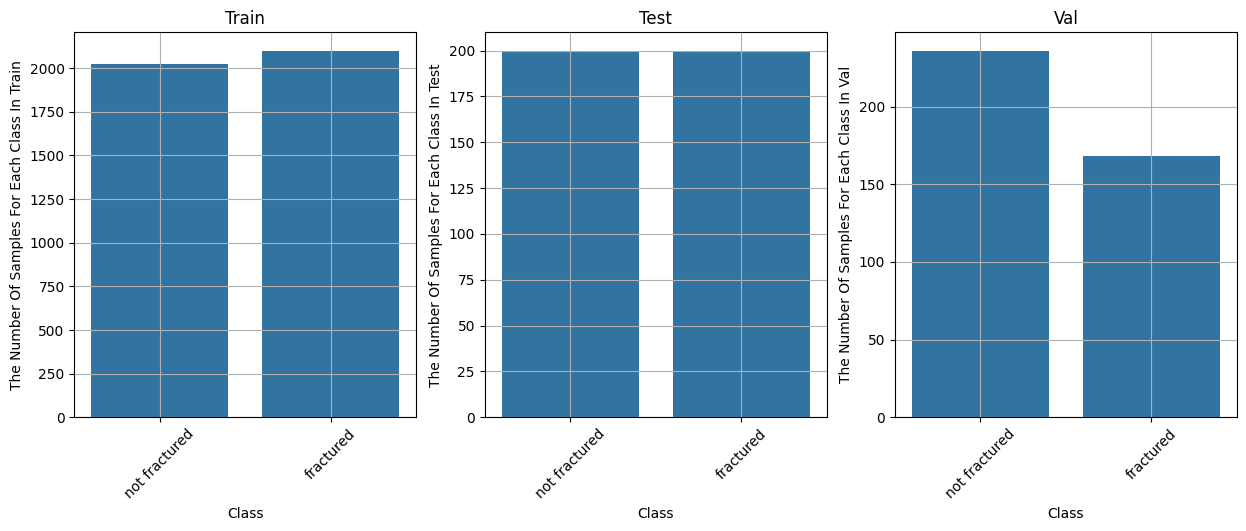

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
ax = sns.countplot(x=train.label)
ax.set_xlabel("Class")
ax.set_ylabel("The Number Of Samples For Each Class In Train")
plt.title('Train')
plt.grid(True)
plt.xticks(rotation=45)
plt.subplot(1,3,2)
ax = sns.countplot(x=test.label)
ax.set_xlabel("Class")
ax.set_ylabel("The Number Of Samples For Each Class In Test")
plt.title('Test')
plt.grid(True)
plt.xticks(rotation=45)
plt.subplot(1,3,3)
ax = sns.countplot(x=val.label)
ax.set_xlabel("Class")
ax.set_ylabel("The Number Of Samples For Each Class In Val")
plt.title('Val')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

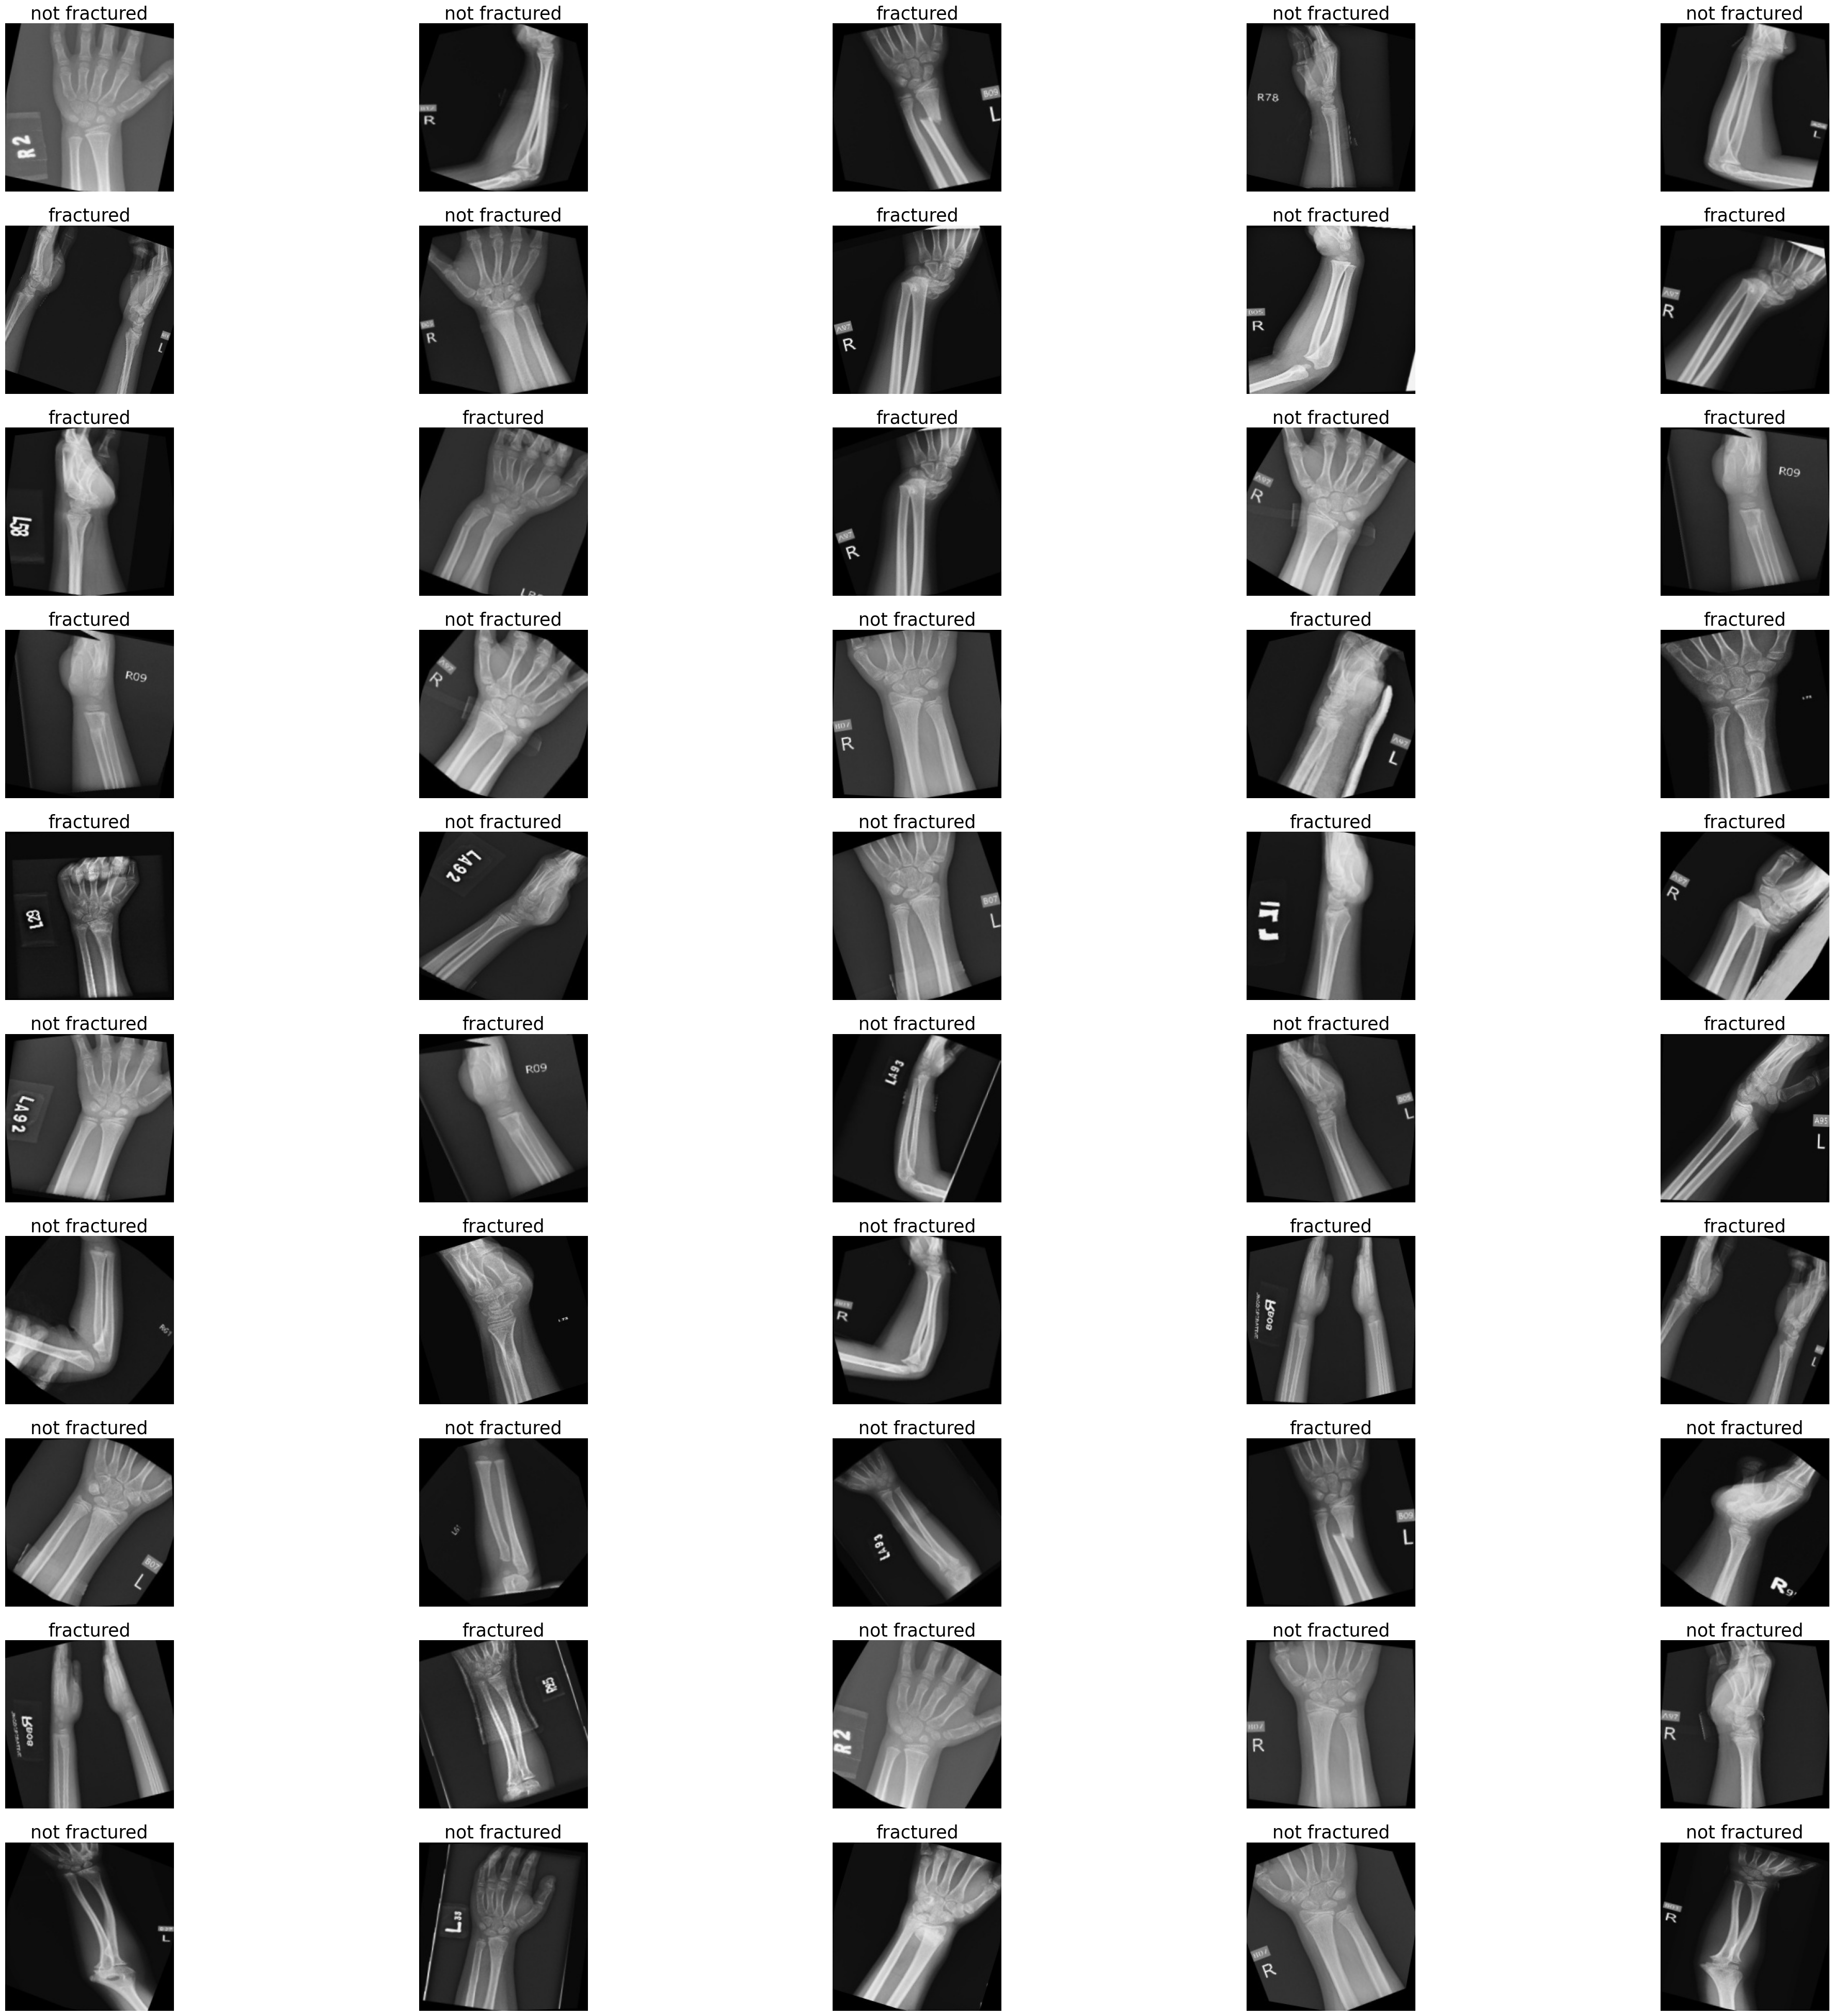

In [ ]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(train),50)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(train.image[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(train.label[i],fontsize=25)

In [ ]:
# DATA AUGEMNTATION
image_size = (224, 224)
batch_size = 32
datagen = ImageDataGenerator(
    rescale=1./255
)
train_generator = datagen.flow_from_dataframe(
    train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)
test_generator = datagen.flow_from_dataframe(
    test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)
val_generator = datagen.flow_from_dataframe(
    val,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 4126 validated image filenames belonging to 2 classes.
Found 399 validated image filenames belonging to 2 classes.
Found 404 validated image filenames belonging to 2 classes.


In [ ]:
class_num=2
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation=tf.nn.relu,input_shape=(224,224,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation=tf.nn.relu))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Dense(class_num,activation=tf.nn.sigmoid))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,278,722 (84.99 MB)

 Trainable params: 22,278,274 (84.98 MB)

 Non-trainable params: 448 (1.75 KB)

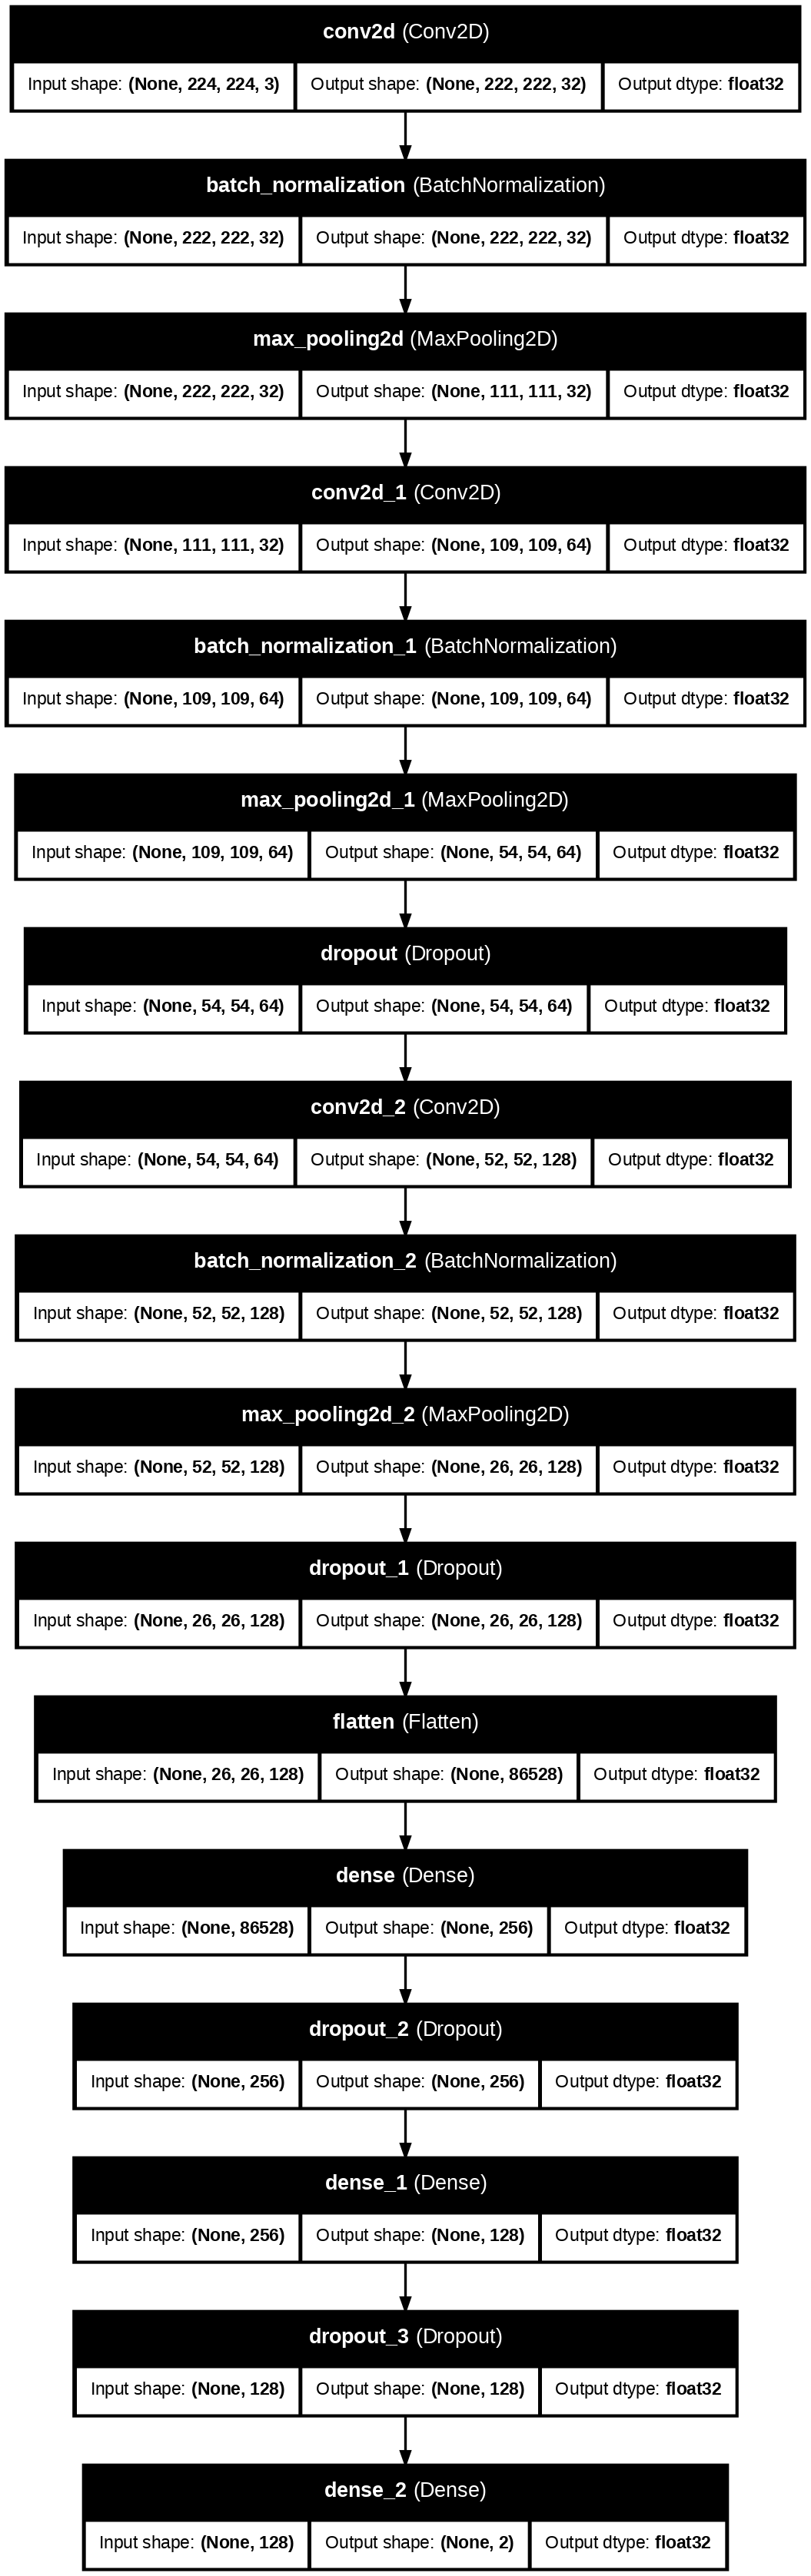

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Model callbacks with increased patience
checkpoint_cb = ModelCheckpoint("improved_keras_model.keras", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

# Image Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load data with generators
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Build the model
model = keras.models.Sequential()

# Adding layers
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Flatten())

# Fully connected layer with reduced regularization
model.add(keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0005)))
model.add(keras.layers.Dropout(0.3))  # Reduced dropout

# Additional fully connected layer
model.add(keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0005)))
model.add(keras.layers.Dropout(0.3))

# Output layer
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model with a slightly higher learning rate and gradient clipping
optimizer = Adam(learning_rate=0.0005, clipnorm=1.0)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', keras.metrics.SpecificityAtSensitivity(0.5), keras.metrics.AUC()])

# Adjusted class weights
class_weight = {0: 1., 1: 10.}

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[checkpoint_cb, early_stopping_cb],
    class_weight=class_weight
)

# Evaluate the model
val_loss, val_acc, val_spec, val_auc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc}, Specificity: {val_spec}, AUC: {val_auc}")


Found 4126 images belonging to 2 classes.
Found 404 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.4877 - auc: 0.4892 - loss: 2.5359 - specificity_at_sensitivity: 0.4604 - val_accuracy: 0.5842 - val_auc: 0.5746 - val_loss: 1.0600 - val_specificity_at_sensitivity: 0.5893
Epoch 2/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 97s 317ms/step - accuracy: 0.4827 - auc: 0.5431 - loss: 1.8761 - specificity_at_sensitivity: 0.5416 - val_accuracy: 0.5842 - val_auc: 0.8530 - val_loss: 0.9183 - val_specificity_at_sensitivity: 0.8929
Epoch 3/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 79s 296ms/step - accuracy: 0.5009 - auc: 0.6124 - loss: 1.7822 - specificity_at_sensitivity: 0.6373 - val_accuracy: 0.5842 - val_auc: 0.8708 - val_loss: 0.8746 - val_specificity_at_sensitivity: 0.8631
Epoch 4/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 41s 301ms/step - accuracy: 0.4832 - auc: 0.7188 - loss: 1.6103 - specificity_at_sensitivity: 0.7603 - val_accuracy: 0.5842 - val_auc: 0.8580 - val_loss: 0.7811 - val_specificity_at_sensitivity: 0.8810
Epoch 5/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 40s 294ms

In [ ]:
# EVALUATION OF THE CNN MODEL BUILT

In [ ]:
history_=pd.DataFrame(history.history)
history_

accuracy       auc      loss  specificity_at_sensitivity  val_accuracy  \
0   0.489336  0.491088  2.188097                    0.466667      0.584158   
1   0.491032  0.568717  1.830181                    0.592857      0.584158   
2   0.491032  0.629574  1.761999                    0.676190      0.584158   
3   0.491275  0.739371  1.573198                    0.796667      0.584158   
4   0.546049  0.780462  1.472845                    0.840952      0.863861   
5   0.602036  0.817931  1.373690                    0.857143      0.891089   
6   0.661173  0.852703  1.257441                    0.908095      0.873762   
7   0.648085  0.833315  1.389297                    0.893333      0.853960   
8   0.685410  0.861376  1.250840                    0.903810      0.858911   
9   0.711100  0.868099  1.245239                    0.920000      0.888614   
10  0.728308  0.883078  1.130206                    0.911905      0.905941   
11  0.739942  0.889857  1.110187                    0.931905      0.910891   
12  0.779205  0.921735  0.976013                    0.950952      0.908416   
13  0.773631  0.920822  1.023750                    0.955714      0.938119   
14  0.801987  0.925029  0.920507                    0.956667      0.893564   
15  0.803442  0.929128  0.933986                    0.963810      0.923267   
16  0.820650  0.932702  0.891486                    0.962857      0.940594   
17  0.826224  0.940908  0.957438                    0.978095      0.905941   
18  0.844886  0.947496  0.795554                    0.977619      0.938119   
19  0.851915  0.951222  0.793940                    0.978571      0.950495   
20  0.874697  0.963155  0.717822                    0.979048      0.938119   
21  0.860397  0.953313  0.802844                    0.973333      0.950495   
22  0.877363  0.965411  0.687528                    0.990952      0.950495   
23  0.874455  0.956416  0.762109                    0.970476      0.943069   
24  0.891420  0.968298  0.675807                    0.992381      0.918317   
25  0.894571  0.973957  0.652456                    0.992381      0.950495   
26  0.887058  0.968600  0.699634                    0.990476      0.957921   
27  0.894086  0.970972  0.671453                    0.991429      0.975248   
28  0.912021  0.980119  0.561767                    0.993333      0.960396   
29  0.908386  0.975182  0.655735                    0.989048      0.972772   

     val_auc  val_loss  val_specificity_at_sensitivity  
0   0.574632  1.060009                        0.589286  
1   0.853019  0.918284                        0.892857  
2   0.870801  0.874567                        0.863095  
3   0.857988  0.781059                        0.880952  
4   0.931207  0.444940                        0.952381  
5   0.915986  0.430391                        0.928571  
6   0.953995  0.428548                        0.976190  
7   0.940249  0.448274                        0.958333  
8   0.961183  0.550729                        0.982143  
9   0.944020  0.358134                        0.976190  
10  0.964210  0.366369                        0.976190  
11  0.977653  0.323687                        0.988095  
12  0.962142  0.298985                        0.976190  
13  0.981084  0.258811                        1.000000  
14  0.976001  0.391171                        0.994048  
15  0.967174  0.303387                        1.000000  
16  0.981777  0.305648                        1.000000  
17  0.987566  0.382358                        1.000000  
18  0.974526  0.312309                        1.000000  
19  0.993341  0.234250                        1.000000  
20  0.988524  0.251947                        1.000000  
21  0.995637  0.308937                        1.000000  
22  0.988625  0.253906                        1.000000  
23  0.997377  0.295842                        1.000000  
24  0.984526  0.309973                        1.000000  
25  0.994098  0.300971                        1.000000  
26  0.995094  0.207953                        

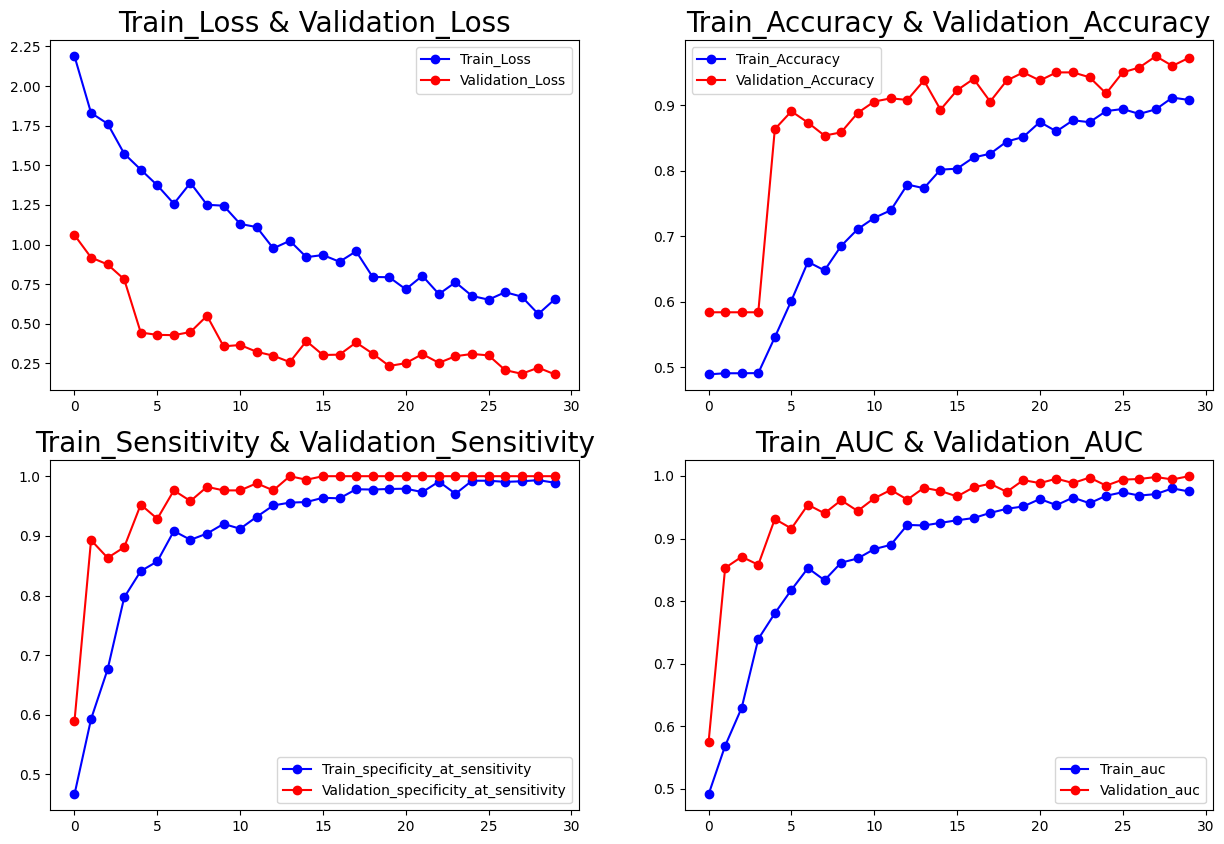

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(history_['loss'],'b-o',label='Train_Loss')
plt.plot(history_['val_loss'],'r-o',label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(2,2,2)
plt.plot(history_['accuracy'],'b-o',label='Train_Accuracy')
plt.plot(history_['val_accuracy'],'r-o',label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.subplot(2,2,3)
plt.plot(history_['specificity_at_sensitivity'],'b-o',label='Train_specificity_at_sensitivity')
plt.plot(history_['val_specificity_at_sensitivity'],'r-o',label='Validation_specificity_at_sensitivity')
plt.title('Train_Sensitivity & Validation_Sensitivity',fontsize=20)
plt.legend()
plt.subplot(2,2,4)
plt.plot(history_['auc'],'b-o',label='Train_auc')
plt.plot(history_['val_auc'],'r-o',label='Validation_auc')
plt.title('Train_AUC & Validation_AUC',fontsize=20)
plt.legend()
plt.show()

In [ ]:
# Define test_datagen
test_datagen = ImageDataGenerator(rescale=1./255)

# Load test data with generator, ensuring batch size > 0
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/test',  # Replace with your test data directory
    target_size=(150, 150),
    batch_size=32,  # Or any batch size greater than 0
    class_mode='binary'
)

# Evaluate the model
score, acc, sensitivity, auc = model.evaluate(test_generator)
print('Test Loss =', score)
print('Test Accuracy =', acc)
print('Test Sensitivity =', sensitivity)
print('Test AUC =', auc)

Found 399 images belonging to 2 classes.
 1/13 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.9688 - auc: 1.0000 - loss: 0.1583 - specificity_at_sensitivity: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 7s/step - accuracy: 0.9579 - auc: 0.9961 - loss: 0.2131 - specificity_at_sensitivity: 1.0000
Test Loss = 0.21731318533420563
Test Accuracy = 0.9598997235298157
Test Sensitivity = 1.0
Test AUC = 0.9971356987953186


In [ ]:
y_test =test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.where(predictions >= 0.5, 1, 0)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step


Actual  Prediction
0         0           0
1         0           1
2         0           1
3         0           0
4         0           0
..      ...         ...
394       1           0
395       1           0
396       1           0
397       1           0
398       1           1

[399 rows x 2 columns]

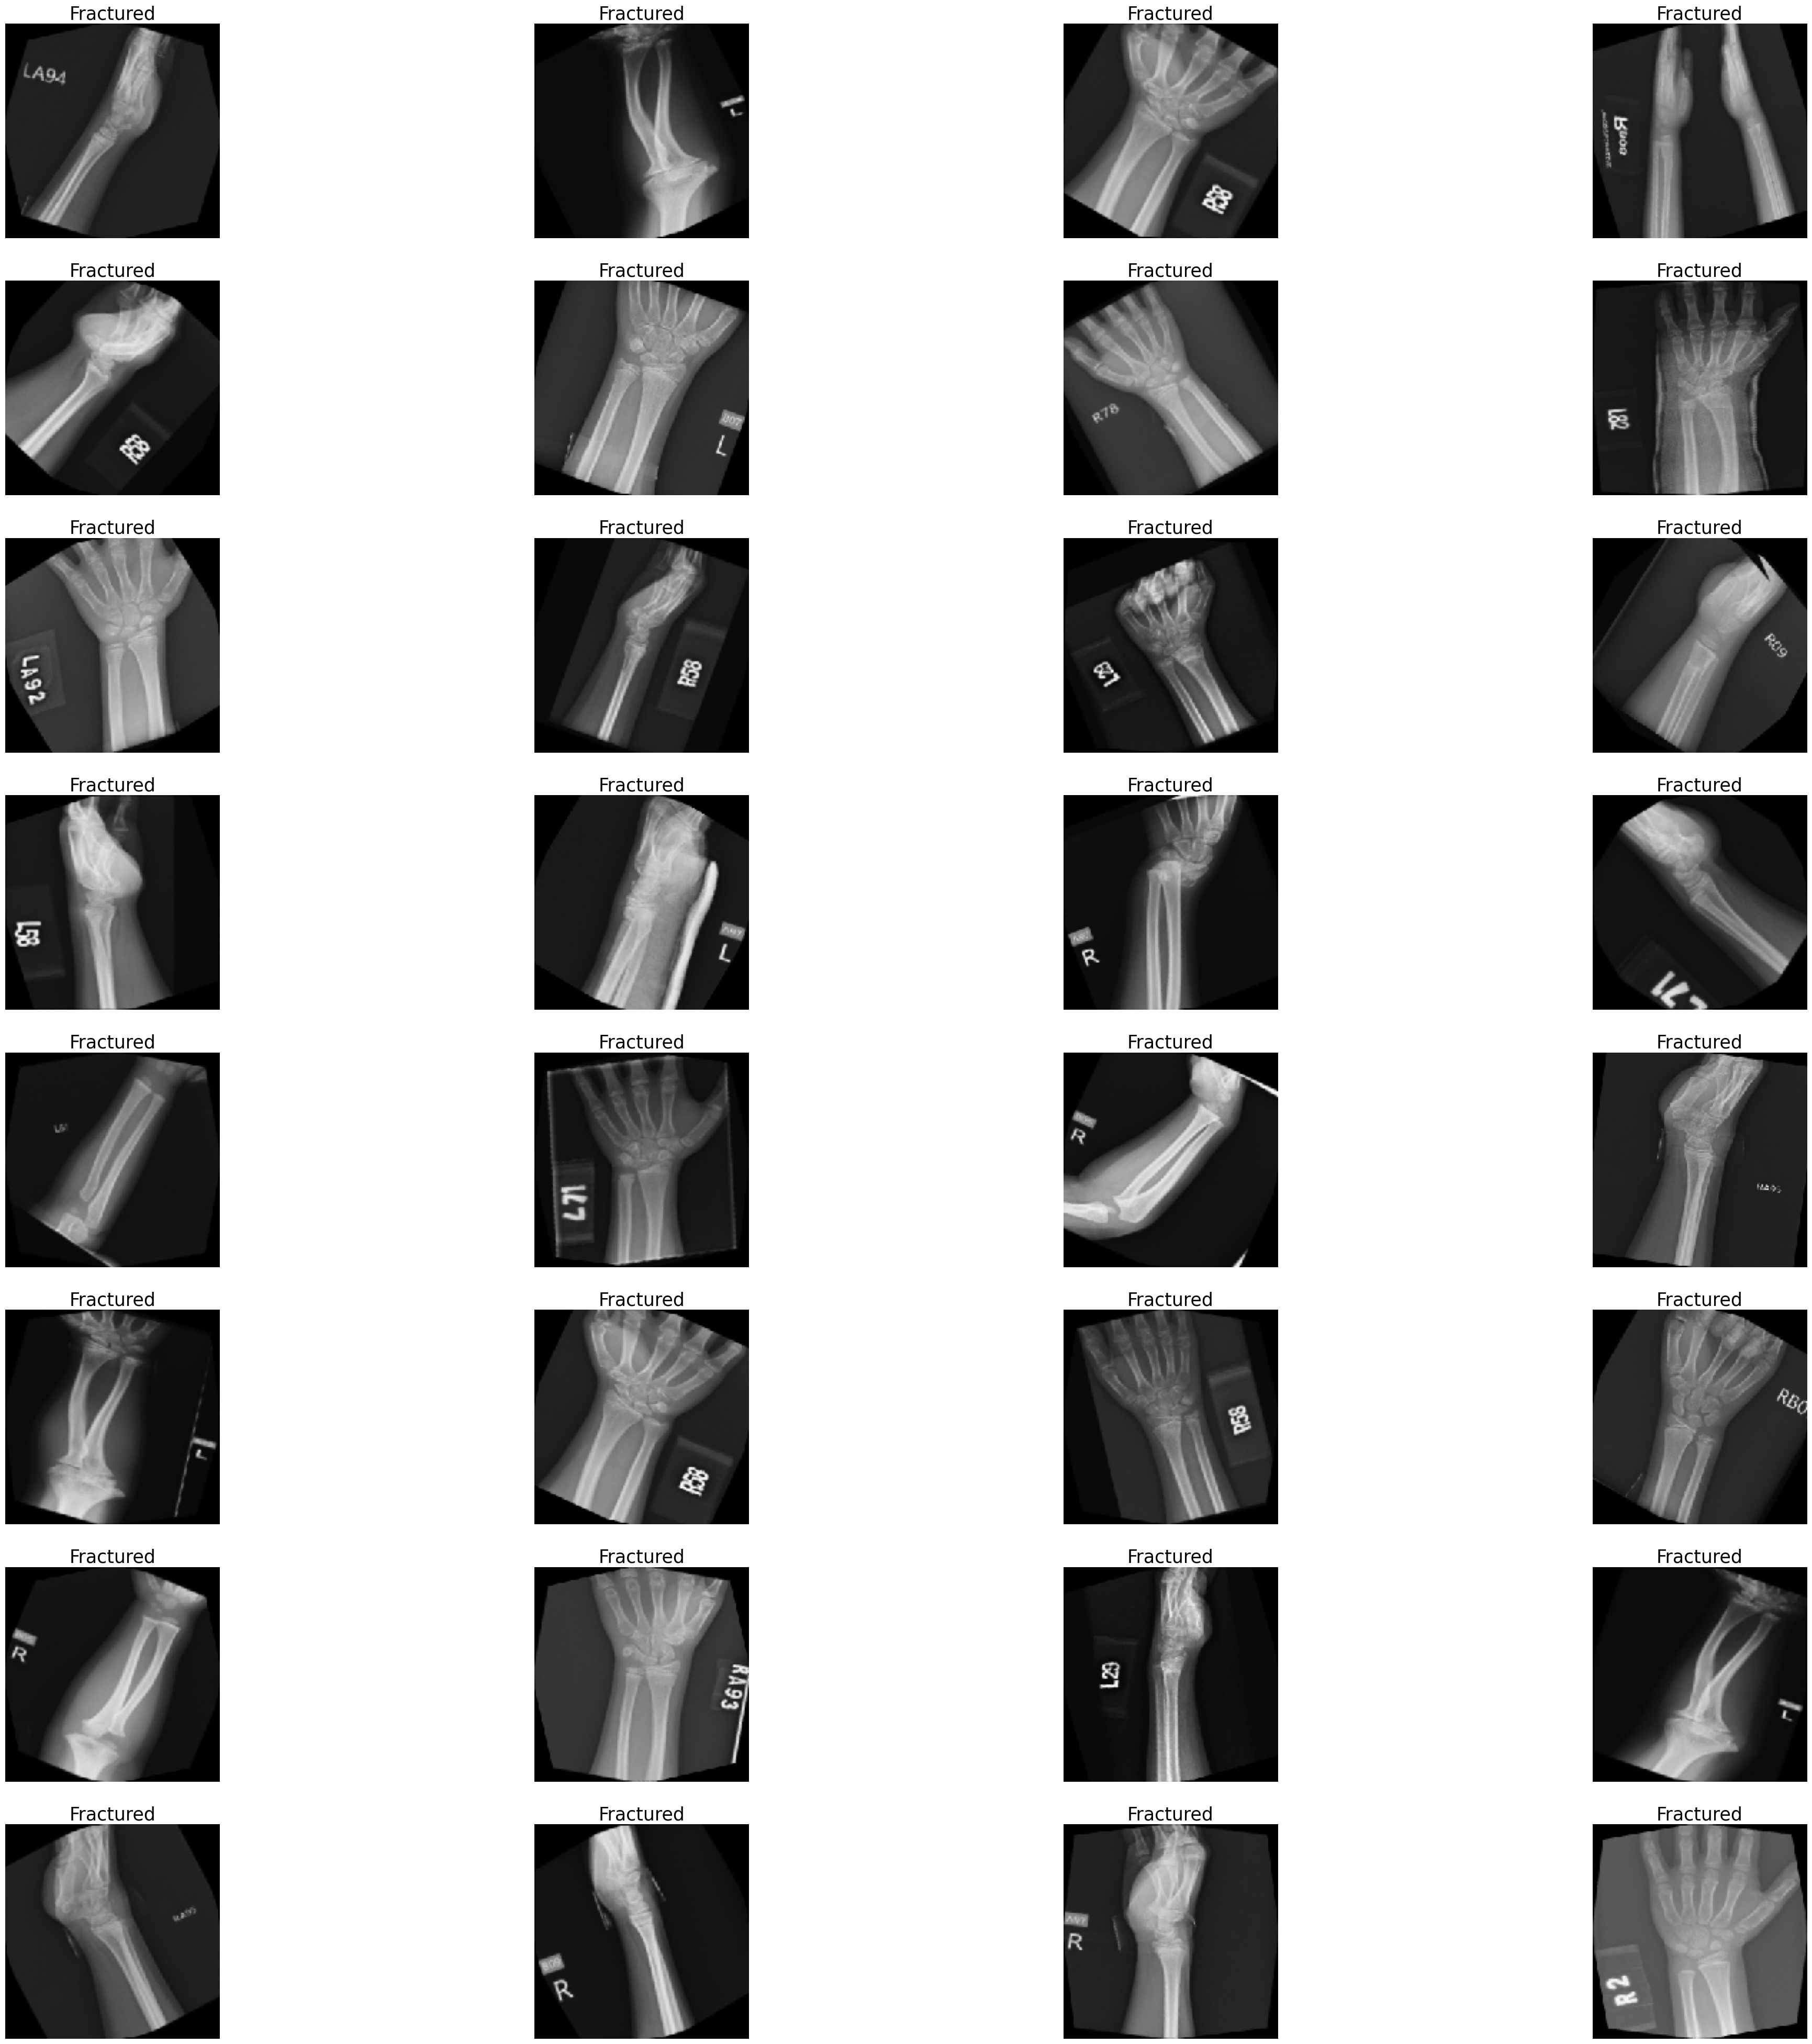

In [ ]:
class_names=['Fractured', 'Not Fractured']
batch = next(test_generator)
images= batch[0]
plt.figure(figsize=(50,50))
for n in range(32):
    plt.subplot(8,4,n+1)
    plt.imshow(images[n])
    plt.axis('off')
    plt.title(class_names[int(y_test[n])],fontsize=25)

array([[ 91, 108],
       [100, 100]])

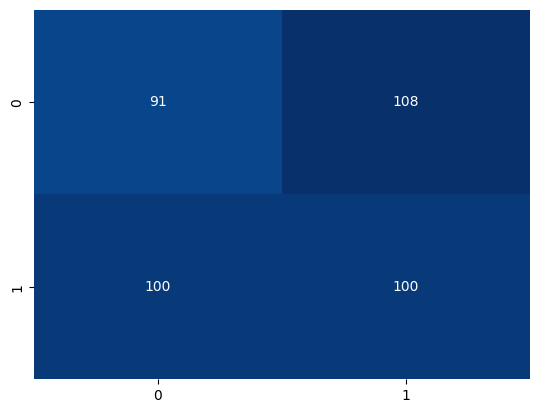

In [ ]:
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')
CM

In [ ]:
# IMPLEMENTATION OF THE DATASET AND MAKING PREDICTIONS USING YOLO V8

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wandb disabled


W&B disabled.


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 27.5 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.utils import class_weight
from tensorflow.keras.applications import DenseNet121
from keras import backend as keras
from ultralytics import YOLO
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!kaggle datasets download -d pkdarabi/bone-fracture-detection-computer-vision-project
!unzip bone-fracture-detection-computer-vision-project.zip > /dev/null

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/bone-fracture-detection-computer-vision-project
License(s): Attribution 4.0 International (CC BY 4.0)
 86% 72.0M/84.1M [00:00<00:00, 135MB/s]
100% 84.1M/84.1M [00:00<00:00, 126MB/s]


In [ ]:
train_images = '/content/BoneFractureYolo8/train/images'
train_labels = '/content/BoneFractureYolo8/train/labels'

test_images = '/content/BoneFractureYolo8/test/images'
test_labels = '/content/BoneFractureYolo8/test/labels'

val_images = '/content/BoneFractureYolo8/valid/images'
val_labels = '/content/BoneFractureYolo8/valid/labels'

In [ ]:
print('Number of train frames: ' + str(len(os.listdir(train_images))))
print('Number of train labels: ' + str(len(os.listdir(train_labels))))
print('Number of val frames: ' + str(len(os.listdir(val_images))))
print('Number of val labels: ' + str(len(os.listdir(val_labels))))
print('Number of test frames: ' + str(len(os.listdir(test_images))))
print('Number of test labels: ' + str(len(os.listdir(test_labels))))
print('Total frames: ' + str(len(os.listdir(train_images)) + len(os.listdir(test_images)) + len(os.listdir(val_images))))

Number of train frames: 3631
Number of train labels: 3631
Number of val frames: 348
Number of val labels: 348
Number of test frames: 169
Number of test labels: 169
Total frames: 4148


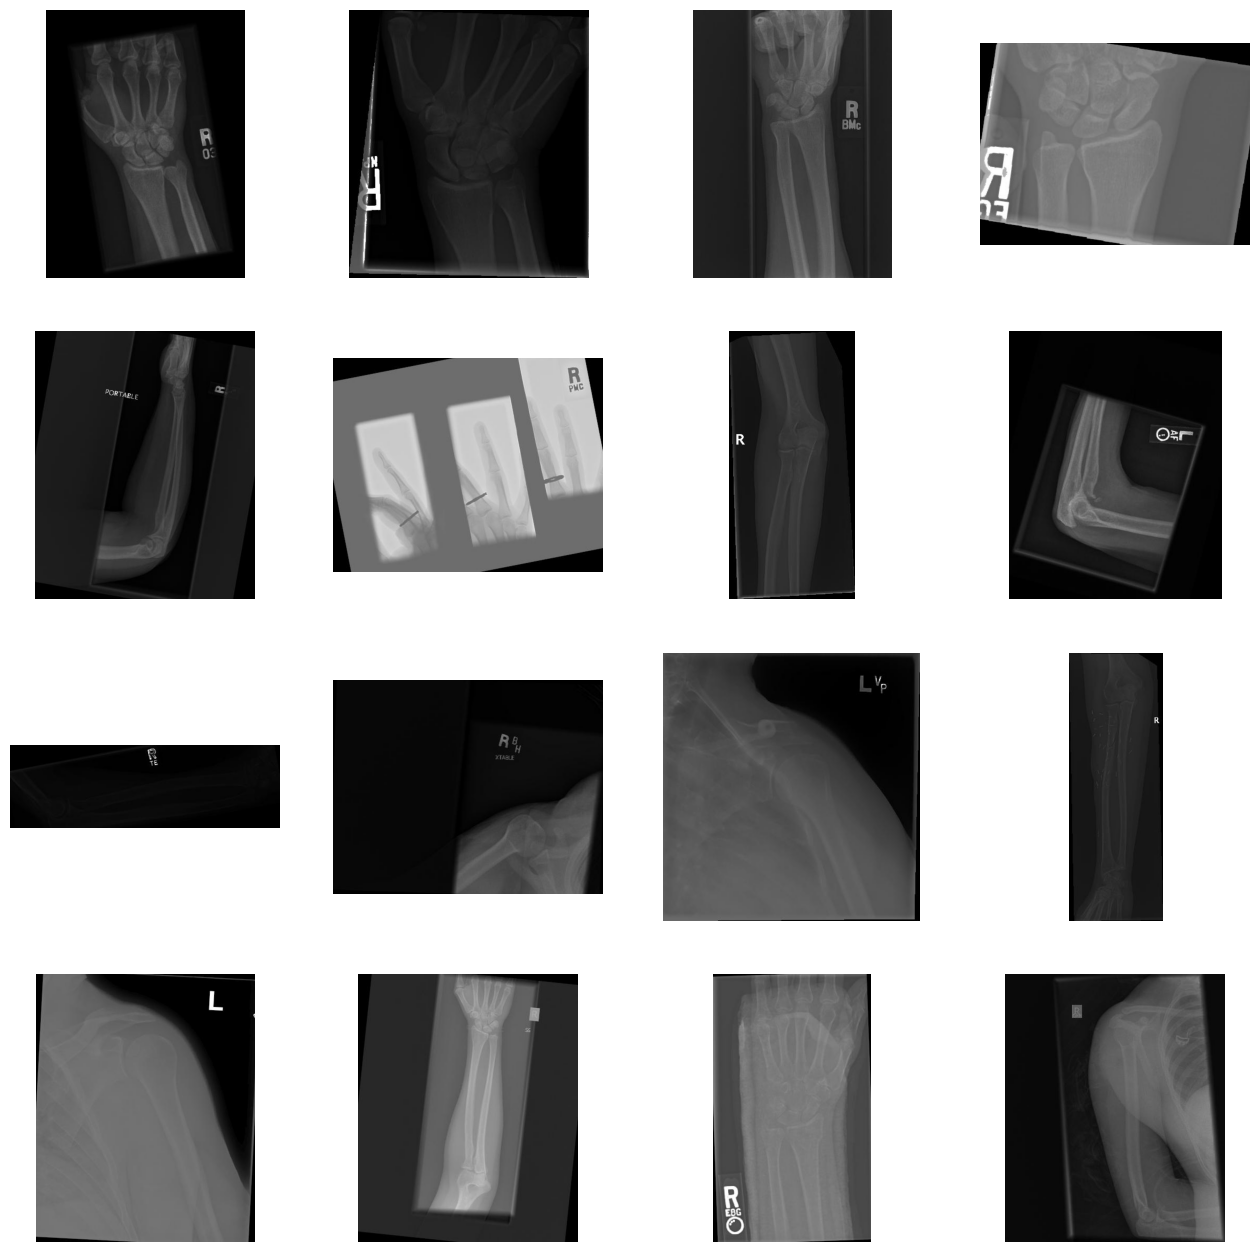

In [ ]:
# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()


In [ ]:
image = cv2.imread('/content/BoneFractureYolo8/train/images/image1_2136_png.rf.80c9e7df0f1a56cef5efa3543c126357.jpg')

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 275x512 and 3 channels.


In [ ]:
# LOADING AND BUILDING THE MODEL YOLO V8

In [ ]:
# Loading a pretrained model
model = YOLO('yolov8s.pt')

# Training the model
model.train(data = '/content/bone fracture detection.v4-v4.yolov8/data.yaml',
            epochs = 25,
            imgsz = height,
            seed = 42

)


Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/bone fracture detection.v4-v4.yolov8/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

train: Scanning /content/bone fracture detection.v4-v4.yolov8/train/labels.cache... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/bone fracture detection.v4-v4.yolov8/valid/labels.cache... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/train10
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.87G      2.849      6.086      2.261         19        512: 100%|██████████| 227/227 [01:05<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.71it/s]


                   all        348        204      0.174       0.16    0.00561    0.00128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.81G       2.57      3.833      2.046         11        512: 100%|██████████| 227/227 [01:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.61it/s]


                   all        348        204     0.0255     0.0307     0.0193     0.0086

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.75G      2.524      3.648      2.055         15        512: 100%|██████████| 227/227 [01:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.50it/s]

                   all        348        204      0.134     0.0716     0.0494     0.0144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.81G      2.492      3.436       2.03         20        512: 100%|██████████| 227/227 [01:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.61it/s]


                   all        348        204      0.447      0.159      0.112      0.039

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.75G      2.377      3.229       1.98         20        512: 100%|██████████| 227/227 [01:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.43it/s]


                   all        348        204       0.13      0.139      0.101     0.0301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.77G      2.336      3.045      1.918         15        512: 100%|██████████| 227/227 [01:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.80it/s]

                   all        348        204      0.408      0.181       0.17     0.0585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.78G      2.277       2.83      1.889         17        512: 100%|██████████| 227/227 [01:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.38it/s]

                   all        348        204      0.147      0.218       0.14     0.0473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25       2.8G      2.224      2.693       1.84         13        512: 100%|██████████| 227/227 [01:02<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.92it/s]

                   all        348        204       0.24      0.196      0.161     0.0546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.75G       2.17      2.612      1.833         24        512: 100%|██████████| 227/227 [01:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.65it/s]

                   all        348        204       0.43      0.232      0.202     0.0754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.77G       2.11       2.51      1.767         23        512: 100%|██████████| 227/227 [01:02<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.73it/s]

                   all        348        204      0.319      0.241       0.24     0.0836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.79G      2.083      2.432       1.77          8        512: 100%|██████████| 227/227 [01:01<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.57it/s]


                   all        348        204      0.271      0.262      0.217     0.0788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       2.8G      2.027      2.314      1.707         11        512: 100%|██████████| 227/227 [01:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.01it/s]

                   all        348        204      0.324      0.281      0.233     0.0849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.75G      1.971      2.209      1.704         14        512: 100%|██████████| 227/227 [01:00<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.28it/s]

                   all        348        204      0.303      0.269      0.221     0.0775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.77G      1.981      2.124      1.673         15        512: 100%|██████████| 227/227 [01:00<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.63it/s]

                   all        348        204      0.299      0.305      0.244     0.0881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.78G      1.905      2.028      1.641         13        512: 100%|██████████| 227/227 [00:59<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.79it/s]

                   all        348        204      0.382      0.293      0.249      0.087


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.79G      1.891      1.967       1.77         12        512: 100%|██████████| 227/227 [00:59<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.79it/s]

                   all        348        204      0.332      0.282       0.27     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.75G      1.808      1.773      1.736         11        512: 100%|██████████| 227/227 [00:58<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.81it/s]

                   all        348        204      0.352      0.278      0.265     0.0851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.77G      1.761      1.668      1.657         12        512: 100%|██████████| 227/227 [00:57<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.68it/s]

                   all        348        204      0.347      0.307      0.253     0.0817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.78G      1.695      1.561      1.629          7        512: 100%|██████████| 227/227 [00:56<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.41it/s]

                   all        348        204       0.37      0.292      0.271     0.0934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       2.8G      1.654       1.45      1.598         11        512: 100%|██████████| 227/227 [00:57<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.90it/s]

                   all        348        204      0.331      0.334      0.285     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.74G      1.592      1.377      1.561         11        512: 100%|██████████| 227/227 [00:57<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.99it/s]

                   all        348        204      0.411      0.291      0.277     0.0972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.78G       1.55       1.27      1.534          6        512: 100%|██████████| 227/227 [00:56<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.73it/s]

                   all        348        204      0.373      0.301      0.276     0.0962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.78G      1.497      1.198      1.505          8        512: 100%|██████████| 227/227 [00:58<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.89it/s]

                   all        348        204      0.327      0.271      0.272     0.0978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.78G      1.446      1.145      1.454          8        512: 100%|██████████| 227/227 [00:57<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.88it/s]

                   all        348        204      0.339      0.345      0.293      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.72G      1.407      1.089      1.427         13        512: 100%|██████████| 227/227 [00:56<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:01<00:00,  5.98it/s]

                   all        348        204      0.353      0.303      0.269     0.0918



25 epochs completed in 0.441 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 22.5MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.21it/s]


                   all        348        204      0.339      0.345      0.293      0.103
        elbow positive         28         29      0.125      0.172     0.0748     0.0176
      fingers positive         41         48      0.238      0.188      0.188     0.0464
      forearm fracture         37         43      0.489      0.558       0.54      0.185
               humerus         31         36      0.664      0.611       0.61      0.229
     shoulder fracture         19         20      0.402      0.437      0.314       0.13
        wrist positive         17         28      0.114      0.107     0.0293    0.00902
Speed: 0.7ms preprocess, 2.6ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train10


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aa3878df040>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

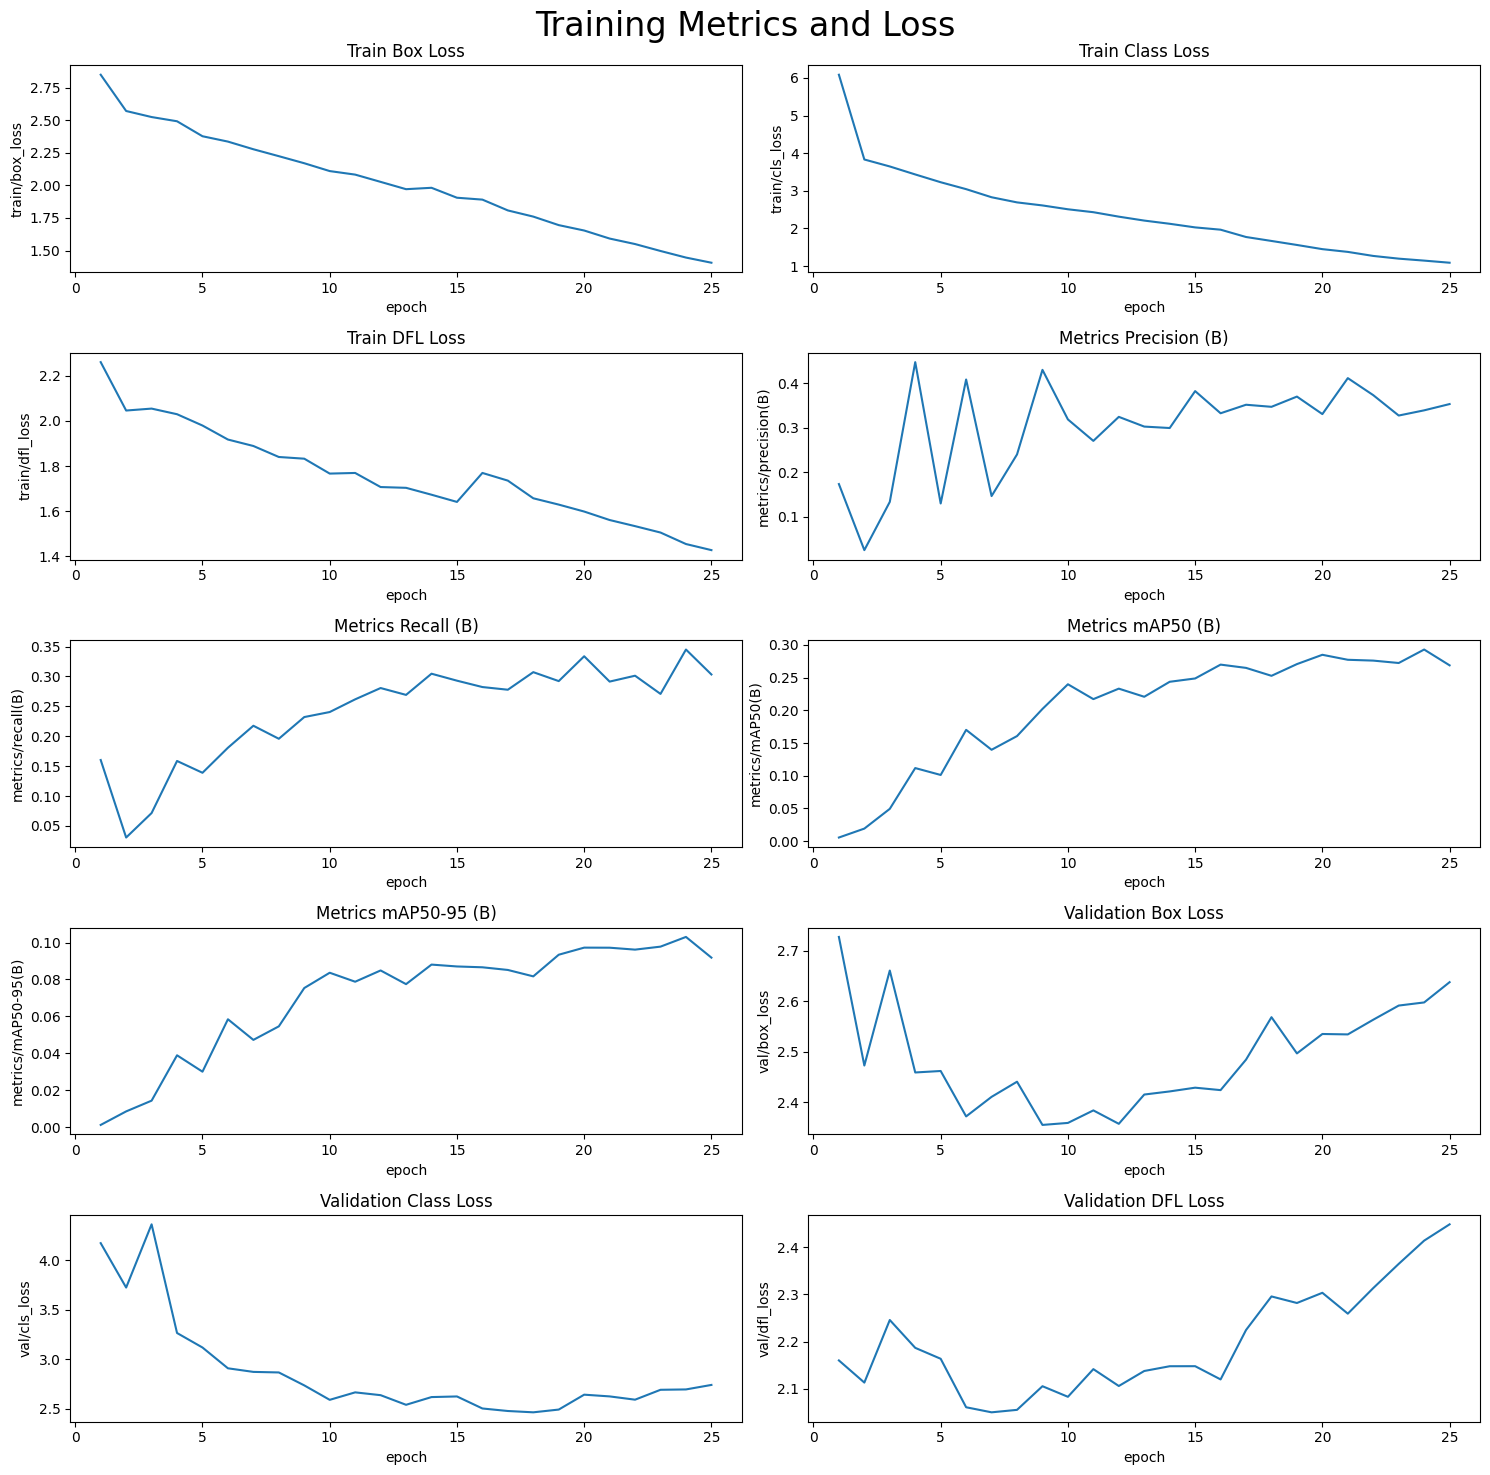

In [ ]:
df = pd.read_csv('/content/runs/detect/train10/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

In [ ]:
# Loading the best performing model
model = YOLO('/content/runs/detect/train10/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/bone fracture detection.v4-v4.yolov8/test/labels.cache... 169 images, 86 backgrounds, 0 corrupt: 100%|██████████| 169/169 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.48it/s]


                   all        169         96      0.465      0.278      0.357      0.135
        elbow positive         13         17          0          0          0          0
      fingers positive         22         27      0.636      0.148      0.351     0.0919
      forearm fracture         13         14      0.825        0.5      0.685      0.309
               humerus         14         15      0.455       0.39      0.386      0.178
     shoulder fracture         15         17      0.499      0.294      0.388      0.112
        wrist positive          6          6      0.375      0.333      0.333       0.12
Speed: 0.4ms preprocess, 6.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val4


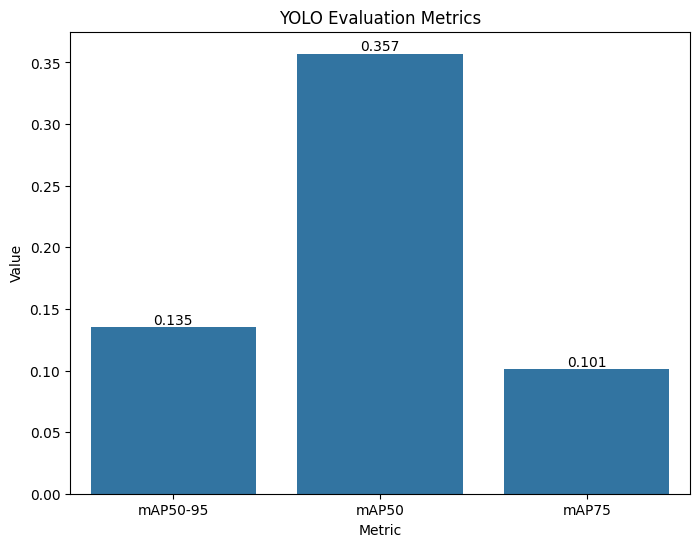

In [ ]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()


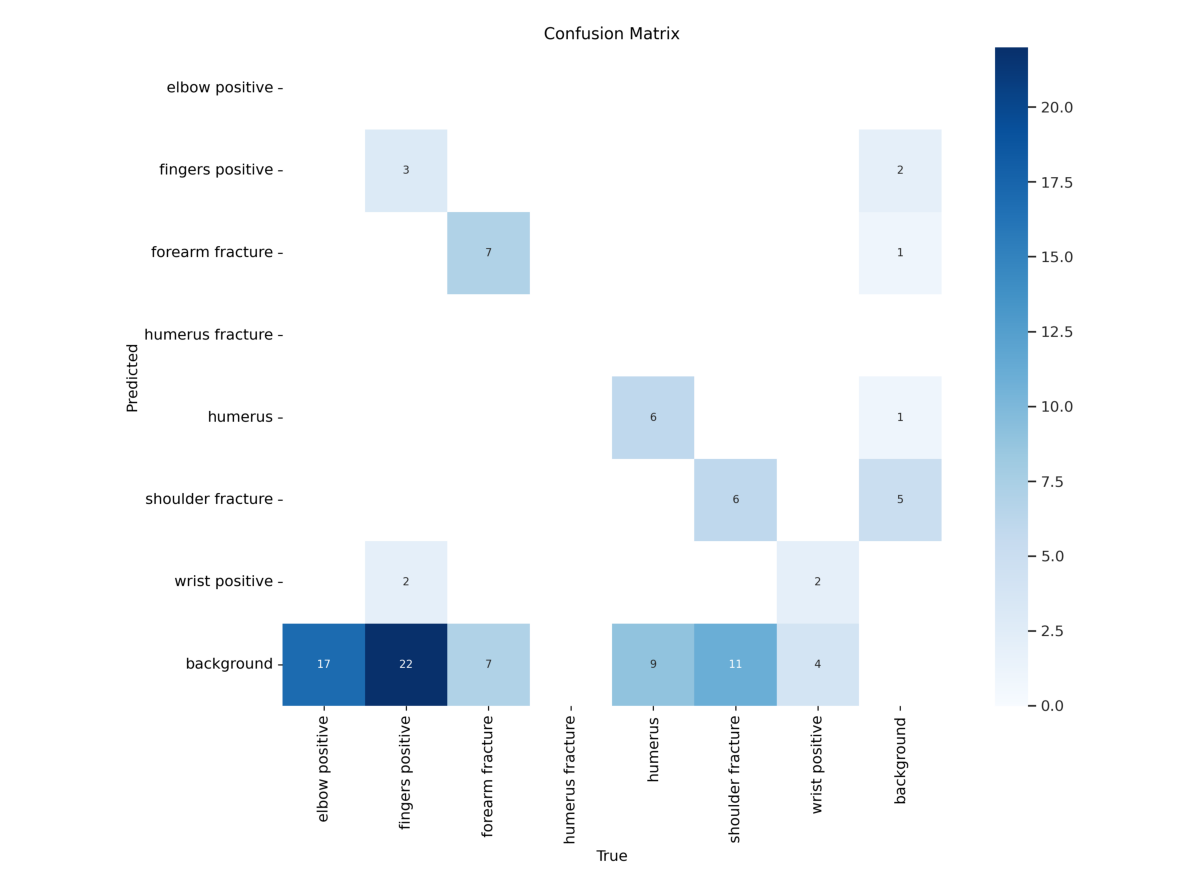

In [ ]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/content/runs/detect/val4/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

In [ ]:
# Making Predictions on Test Images

In [ ]:
#Function to perform ship detections
def ship_detect(img_path):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 512x448 (no detections), 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 448)

0: 512x160 1 forearm fracture, 10.3ms
Speed: 0.9ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 160)

0: 512x320 (no detections), 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 320)

0: 512x512 (no detections), 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 512)

0: 512x416 (no detections), 11.4ms
Speed: 1.5ms preprocess, 11.4ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 416)

0: 448x512 (no detections), 11.4ms
Speed: 2.5ms preprocess, 11.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 512)

0: 512x384 (no detections), 12.0ms
Speed: 1.5ms preprocess, 12.0ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 384)

0: 512x448 (no detections), 12.8ms
Speed: 2.3ms preprocess, 12.8m

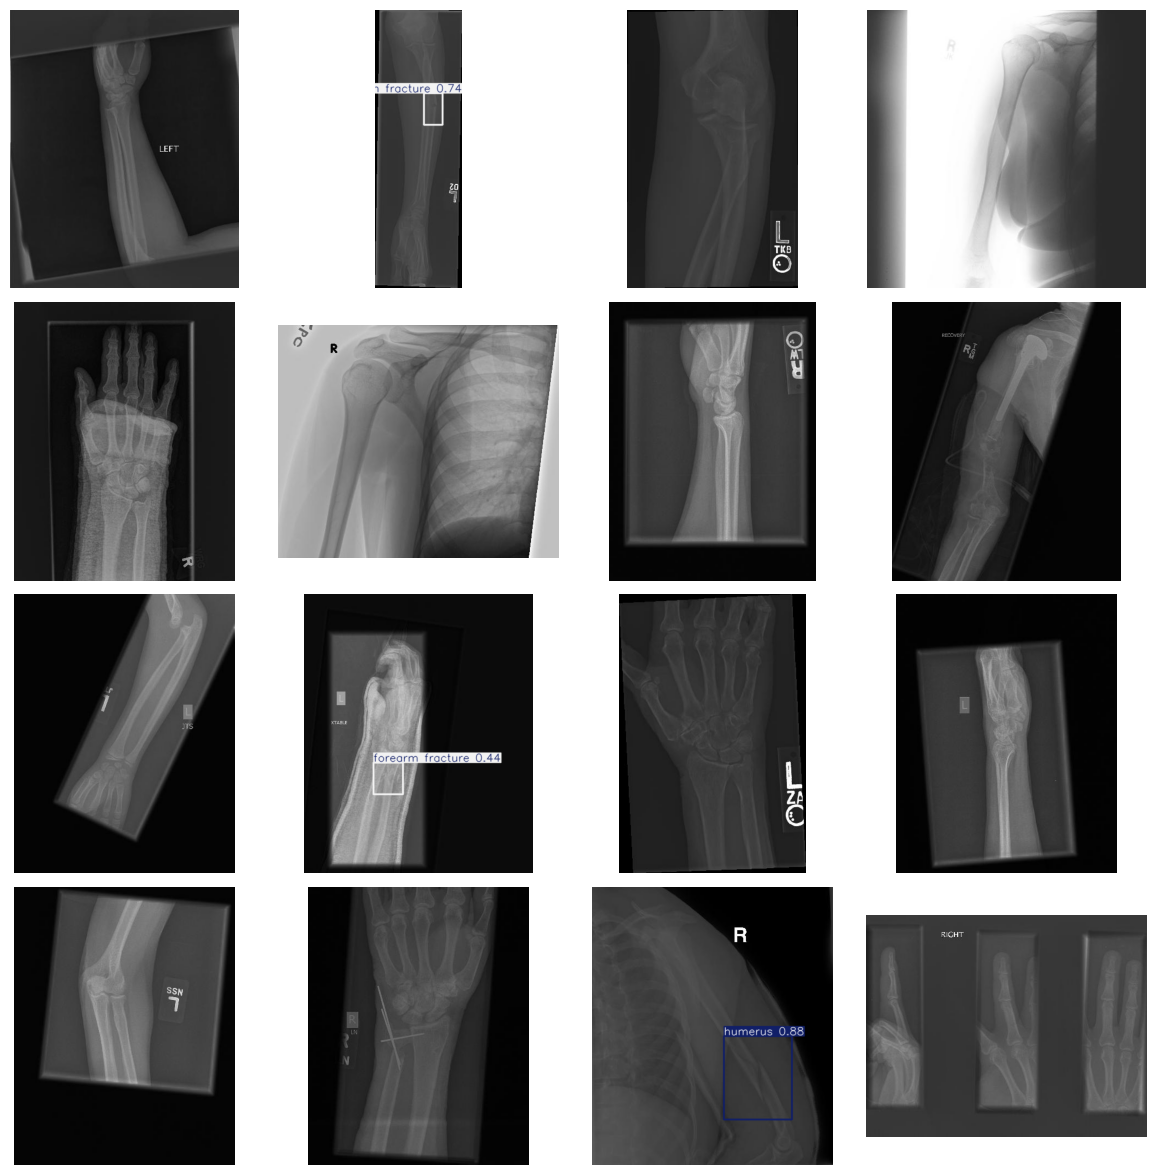

In [ ]:
import random

# Define the directory where the custom images are stored
custom_image_dir = test_images

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
train: '/content/BoneFractureYolo8/train'
val:  '/content/BoneFractureYolo8/valid'
test: '/content/BoneFractureYolo8/test'

# Classes
nc: 1 # Number of classes
names: ['Fracture'] # Class names

In [ ]:
# IMPLEMENTATION USING SVM,KNN,DECISION TREE
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
model = VGG16(weights='imagenet', include_top=False)

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
def preprocess_images(img_paths):
    preprocessed_images = []
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)
        preprocessed_images.append(img_array)
    return np.array(preprocessed_images)

In [ ]:
def extract_features(img_paths):
    preprocessed_images = preprocess_images(img_paths)
    features = model.predict(preprocessed_images)
    return features.reshape(len(img_paths), -1)

In [ ]:
# Function for lading dataset
def load_dataset(dataset_dir):
    classes = os.listdir(dataset_dir)
    images = []
    labels = []
    for class_name in classes:
        class_dir = os.path.join(dataset_dir, class_name)
        class_images = [os.path.join(class_dir, img_name) for img_name in os.listdir(class_dir)]
        images.extend(class_images)
        labels.extend([class_name] * len(class_images))
    return images, labels

In [ ]:
import os

def list_files_in_directory(dir_path):
    """
    Function to list all files and subdirectories in the given directory.
    """
    directory_structure = {}

    # Walk through the directory
    for root, dirs, files in os.walk(dir_path):
        # Current directory and its subdirectories
        directory_structure[root] = {'dirs': dirs, 'files': files}

    return directory_structure

# Example usage:
folder_path = "/content/drive/MyDrive/train"  # Replace with your actual folder path
directory_structure = list_files_in_directory(folder_path)

# Print the directory structure
for root, content in directory_structure.items():
    print(f"Directory: {root}")
    print(f"  Subdirectories: {content['dirs']}")
    print(f"  Files: {content['files']}")


Directory: /content/drive/MyDrive/train
  Subdirectories: ['not fractured', 'fractured']
  Files: ['desktop.ini']
Directory: /content/drive/MyDrive/train/not fractured
  Subdirectories: []
  Files: ['4-rotated2-rotated1-rotated1-rotated1.jpg', '4-rotated1-rotated2.jpg', '4-rotated2.jpg', '4-rotated1-rotated3-rotated3.jpg', '4-rotated2-rotated3-rotated1.jpg', '4-rotated2-rotated2-rotated3-rotated1.jpg', '4.jpg', '4-rotated3-rotated3-rotated3.jpg', '4-rotated1-rotated2-rotated3-rotated1.jpg', '4-rotated1-rotated2-rotated2-rotated1.jpg', '4-rotated2-rotated2-rotated3.jpg', '4-rotated3-rotated1-rotated3-rotated1.jpg', '4-rotated3-rotated3.jpg', '4-rotated2-rotated3-rotated2.jpg', '4-rotated3-rotated3-rotated1.jpg', '4-rotated2-rotated1-rotated3-rotated1.jpg', '4-rotated2-rotated2-rotated2-rotated1.jpg', '4-rotated3-rotated2-rotated3-rotated1.jpg', '4-rotated2-rotated1-rotated2.jpg', '4-rotated2-rotated3-rotated3.jpg', '4-rotated1-rotated2-rotated2.jpg', '4-rotated1.jpg', '4-rotated3-rotate

In [ ]:
import os

# Function for loading dataset
def load_dataset(dataset_path):
    """
    Load dataset from a folder path.

    Args:
    - dataset_path: str, the full path of the dataset folder

    Returns:
    - images: list, paths to all images in the dataset
    - labels: list, corresponding class labels for the images
    """
    images = []
    labels = []

    # Loop over all classes (subdirectories)
    for class_name in os.listdir(dataset_path):
        class_dir = os.path.join(dataset_path, class_name)

        # Check if it is a directory (ignores any potential non-directory files)
        if os.path.isdir(class_dir):
            # Get all images in this class directory
            class_images = [os.path.join(class_dir, img_name) for img_name in os.listdir(class_dir)
                            if img_name.lower().endswith(('png', 'jpg', 'jpeg'))]  # Add more extensions if needed
            images.extend(class_images)
            labels.extend([class_name] * len(class_images))  # Assign the class label to each image

    return images, labels

# Example usage:
folder_path = r'/content/drive/MyDrive/train'  # Replace this with the actual path of your dataset
images, labels = load_dataset(folder_path)

# Now 'images' contains the paths to all images and 'labels' has the corresponding labels


In [ ]:
folder_path = r'/content/drive/MyDrive/train'
images, labels = load_dataset(folder_path)
print(folder_path)

/content/drive/MyDrive/train


In [ ]:
# Load dataset
dataset_path = r'/content/drive/MyDrive/train'
images, labels = load_dataset(dataset_path)

In [ ]:
features = extract_features(images)

129/129 ━━━━━━━━━━━━━━━━━━━━ 38s 196ms/step


In [ ]:
features.shape

(4126, 25088)

In [ ]:
features

array([[ 0.       ,  0.       ,  0.       , ...,  0.       , 19.449335 ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       , 16.014805 ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  7.2855425,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  4.0417376,
         0.       ]], dtype=float32)

In [ ]:
# Split into test and training sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Evaluate classifier performance
#accuracy = svm_classifier.score(X_test, y_test)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for SVM:", accuracy)

Accuracy for SVM: 1.0


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(min_samples_split=40)
dt_classifier.fit(X_train, y_train)
dt_accuracy = dt_classifier.score(X_test, y_test)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.937046004842615


In [ ]:
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=30)
knn_classifier.fit(X_train, y_train)
knn_accuracy = knn_classifier.score(X_test, y_test)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.9697336561743342


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_accuracy = rf_classifier.score(X_test, y_test)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9975786924939467


In [ ]:
#function to preprocess single image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    return np.expand_dims(img_array, axis=0)

In [ ]:
#function to extract features in a single image
def extract_features_single(img_path):
    preprocessed_image = preprocess_image(img_path)
    features = model.predict(preprocessed_image)
    return features.reshape(1, -1)  # Flatten features

In [ ]:
test_img_path = r"/content/drive/MyDrive/test/fractured/1-rotated3-rotated2-rotated3 - Copy.jpg"

In [ ]:
# Extract features and predict label for test image
test_features = extract_features_single(test_img_path)
predicted_label = svm_classifier.predict(test_features)[0]
print("Predicted Label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Label: fractured


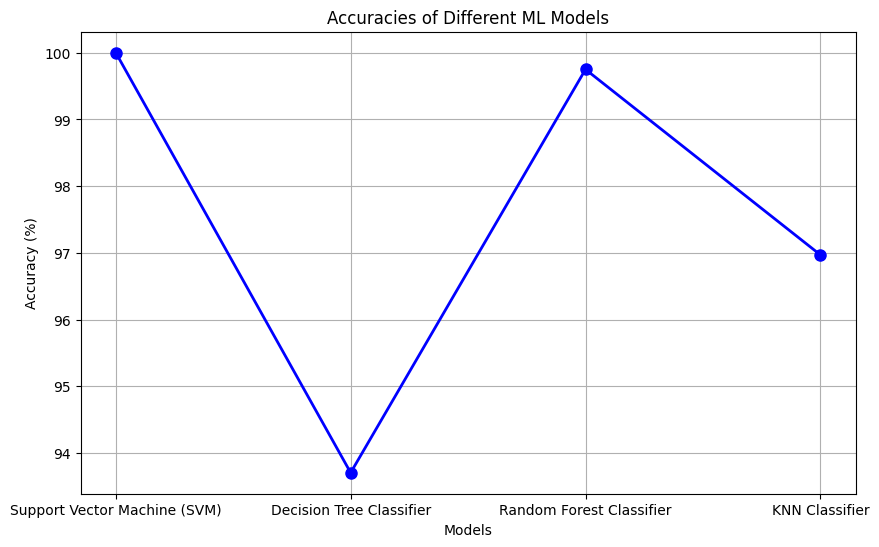

In [ ]:
# LINE PLOT FOR THE COMPARISION OF ACCURACIES OF IMPLEMENTED MODELS
import matplotlib.pyplot as plt

# Data for accuracies
models = ['Support Vector Machine (SVM)', 'Decision Tree Classifier', 'Random Forest Classifier', 'KNN Classifier']
accuracies = [100, 93.704, 99.75, 96.97]

# Creating a line plot
plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Adding titles and labels
plt.title("Accuracies of Different ML Models")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")

# Adding grid for better readability
plt.grid(True)

# Display the chart
plt.show()



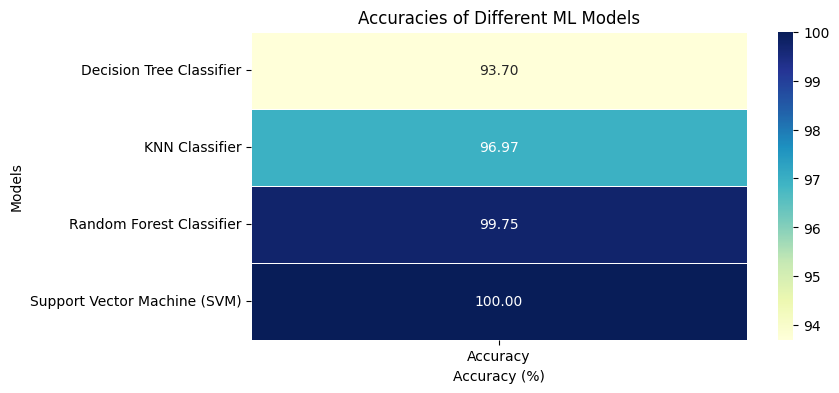

In [ ]:
# HEATMAP FOR THE VISUALISATION OF ACCURACIES
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for accuracies
models = ['Support Vector Machine (SVM)', 'Decision Tree Classifier', 'Random Forest Classifier', 'KNN Classifier']
accuracies = [100, 93.704, 99.75, 96.97]

# Create a DataFrame for seaborn heatmap
data = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
data_pivot = data.pivot_table(index='Model', values='Accuracy')

# Plotting the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(data_pivot, annot=True, cmap='YlGnBu', cbar=True, fmt=".2f", linewidths=0.5)

# Titles and labels
plt.title("Accuracies of Different ML Models")
plt.xlabel("Accuracy (%)")
plt.ylabel("Models")

# Display the heatmap
plt.show()
